<a href="https://colab.research.google.com/github/nourezzeddine1/VIP401/blob/main/Grabcut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
image_path = '/content/drive/My Drive/image1.jpeg'
image = cv2.imread(image_path)

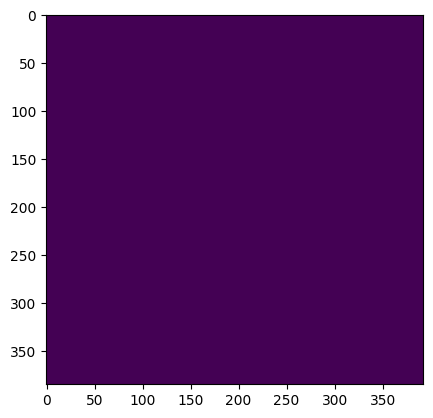

In [23]:
mask = np.zeros(image.shape[:2], np.uint8)
plt.imshow(mask)

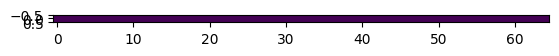

In [27]:
backgroundModel = np.zeros((1, 65), np.float64)
plt.imshow(backgroundModel)
foregroundModel = np.zeros((1, 65), np.float64)
plt.imshow(foregroundModel)

In [29]:
rectangle = (2, 2, 433,418)

define the Region of Interest (ROI)
as the coordinates of the rectangle where the values are entered as
(startingPoint_x, startingPoint_y, width, height)
 these coordinates are according to the input image
 it may vary for different images


In [32]:
cv2.grabCut(image, mask , rectangle,
			backgroundModel, foregroundModel,
			3, cv2.GC_INIT_WITH_RECT)


(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 2, ..., 2, 2, 2],
        ...,
        [0, 0, 2, ..., 3, 3, 3],
        [0, 0, 2, ..., 3, 3, 3],
        [0, 0, 2, ..., 3, 3, 3]], dtype=uint8),
 array([[1.96810500e-01, 1.97660580e-01, 1.93410181e-01, 2.92903533e-01,
         1.19215206e-01, 3.56014167e+01, 8.01164478e+01, 6.22482723e+01,
         1.15449510e+02, 1.69753484e+02, 1.62018751e+02, 1.20010549e+01,
         3.60232068e+01, 2.38850211e+01, 1.68420246e+02, 2.05511841e+02,
         1.87969584e+02, 6.92033657e+01, 1.11543639e+02, 9.94124358e+01,
         1.39446349e+02, 9.82426823e+01, 6.70782246e+01, 9.82426823e+01,
         2.60014774e+02, 1.86631766e+02, 6.70782246e+01, 1.86631766e+02,
         1.67069840e+02, 7.78717088e+02, 5.02556881e+02, 5.41445726e+02,
         5.02556881e+02, 5.29137062e+02, 5.81248386e+02, 5.41445726e+02,
         5.81248386e+02, 8.65036462e+02, 5.98052028e+01, 5.82116492e+01,
         3.17012465e+01, 5.82116492e+01, 1.7

Parameters
1. image	input 8-bit 3-channel image.
2. mask	input/output 8-bit single-channel mask. The mask is initialized by the function when mode is set to GC_INIT_WITH_RECT. Its elements may have one of the cv.grabCutClasses.
3. rect	ROI containing a segmented object. The pixels outside of the ROI are marked as "obvious background". The parameter is only used when mode==GC_INIT_WITH_RECT.
4. bgdModel	temporary array for the background model. Do not modify it while you are processing the same image.
5. fgdModel	temporary arrays for the foreground model. Do not modify it while you are processing the same image.
6. iterCount	number of iterations the algorithm should make before returning the result. Note that the result can be refined with further calls with mode==GC_INIT_WITH_MASK or mode==GC_EVAL .
7. mode	operation mode that could be one of the cv::GrabCutMode.
    Operation mode that could be one of the following:
    GC_INIT_WITH_RECT The function initializes the state and the mask using the provided rectangle. After that it runs iterCount iterations of the algorithm.
    GC_INIT_WITH_MASK The function initializes the state using the provided mask. Note that GC_INIT_WITH_RECT and GC_INIT_WITH_MASK can be combined. Then, all the pixels outside of the ROI are automatically initialized with GC_BGD .
    GC_EVAL The value means that the algorithm should just resume.

In [ ]:
mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8')
plt.imshow(mask)
plt.imshow(mask2)

The algorithm iteratively updates its estimation of the foreground and background regions based on the color and texture information in the image. It assigns each pixel to one of the following categories:

* Sure Foreground (3): Pixels that are confidently identified as foreground.
* Probable Foreground (2): Pixels that are likely to be foreground but are      less  confidently identified.
* Probable Background (0): Pixels that are likely to be background.
* Sure Background (1): Pixels that are confidently identified as background.
* Unknown (GC_PR_BGD): Pixels that are not yet classified.

We modify the mask (mask2) to create a binary mask where pixels classified as probable background or background are set to 0, and all other pixels are set to 1.

In this new mask image, pixels will be marked with four flags denoting background/foreground as specified above. So we modify the mask such that all 0-pixels and 2-pixels are put to 0 (ie background) and all 1-pixels and 3-pixels are put to 1(ie foreground pixels).

In [22]:
image_segmented = image * mask2[:, :, np.newaxis]

Now our final mask is ready, and we can just multiply it with input image to get the segmented image. As (0,0,0) would represent a black image.

(-0.5, 392.5, 384.5, -0.5)

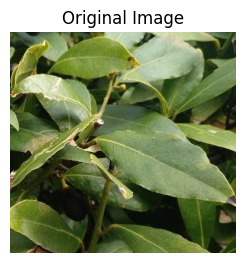

In [21]:
# output segmented image with colorbar
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')


(-0.5, 392.5, 384.5, -0.5)

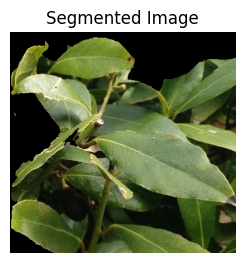

In [14]:
# Display the segmented image
plt.subplot(1, 2, 2)
plt.title('Segmented Image')
plt.imshow(cv2.cvtColor(image_segmented, cv2.COLOR_BGR2RGB))
plt.axis('off')


In [15]:
plt.show()